nama : arini alfi mawadhah

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/ds_salaries.csv")

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


1. Exploratory Data Analysis (EDA)

1.1 Check Null Values

In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

1.2 Check Duplicated Data

In [ ]:
data.shape

(3755, 11)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_data)

number of duplicate rows:       work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_c

In [ ]:
#drop duplicate data
data = data.drop_duplicates()

In [ ]:
data.shape

(2584, 11)

1.3 Check Unique Value in Each Column

In [ ]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
for column in data.columns :
  if data[column].dtypes == object:

    num_distinct_values = data[column].nunique()
    distinct_values = data[column].unique()

    print(f"{column}:{num_distinct_values} -> {distinct_values}\n")

experience_level:4 -> ['SE' 'MI' 'EN' 'EX']

employment_type:4 -> ['FT' 'CT' 'FL' 'PT']

job_title:93 -> ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist'

1.4 Rename The Value For Better Understanding

In [ ]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level'
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT': 'Full-time',
    'PT': 'Part-time'
})

data['remote_ratio'] = data['remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100: 'Full-Remote'
})

<ipython-input-13-affbc3506619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_level'] = data['experience_level'].replace({
<ipython-input-13-affbc3506619>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employment_type'] = data['employment_type'].replace({
<ipython-input-13-affbc3506619>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L


1.5 Group The Job Title

In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering :
    return "Data Engineering"
  elif job_title in data_scientist :
    return "Data Scientist"
  elif job_title in machine_learning :
    return "Machine Learning "
  elif job_title in data_architecture :
    return "Data Architecture"
  elif job_title in management :
    return "Management"
  else :
    return "Other"

  data.loc[:,'job_category'] = data ['job_title'].apply(assign_broader_category)



In [ ]:
data['job_category']= data['job_title'].apply(assign_broader_category)
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


1.6 Adjust Salary to present Value

In [ ]:
# Inflation Rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}
#Function to adjust salary
def adjust_salary(row) :
  year = row['work_year']
  original_salary = row ['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else :
    adjusted_salary =original_salary

    for y in range (year, 2023):
      if currency == 'USD':
        inflation_rate = us_inflation_rates[y]
      else :
        inflation_rate = global_inflation_rates[y]

      adjusted_salary = adjusted_salary  * (1 + inflation_rate)

    return adjusted_salary


In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other,85847.000000
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other,168373.305000
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


1.7 Job Distribution

In [ ]:
value_counts = data['job_category'].value_counts(normalize = True)*100
value_counts

Data Engineering     44.156347
Data Scientist       24.729102
Other                15.402477
Machine Learning      9.442724
Management            3.637771
Data Architecture     2.631579
Name: job_category, dtype: float64

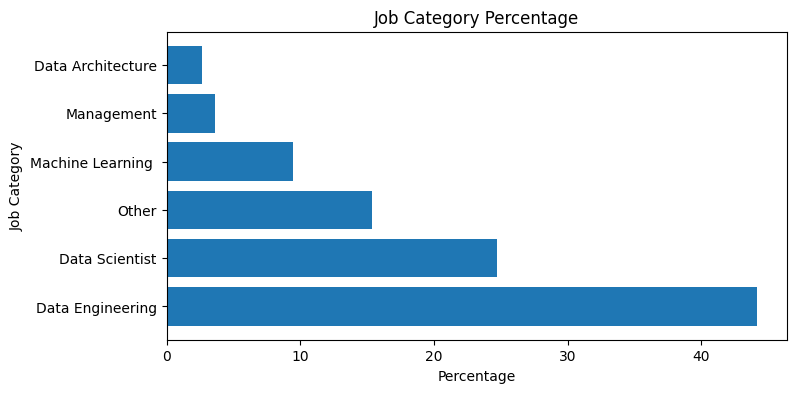

In [ ]:
fig, ax = pyplot.subplots(figsize=(8,4))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')

ax.set_ylabel('Job Category')

pyplot.show()

1.8 Distribution Across different employment types

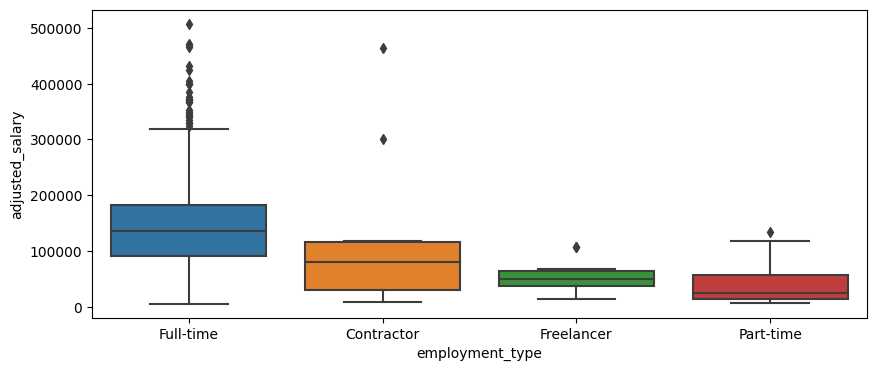

In [ ]:
pyplot.figure(figsize=(10,4))

sns.boxplot(data=data, x='employment_type',y='adjusted_salary')

pyplot.show()

1.9 Distribution Salary

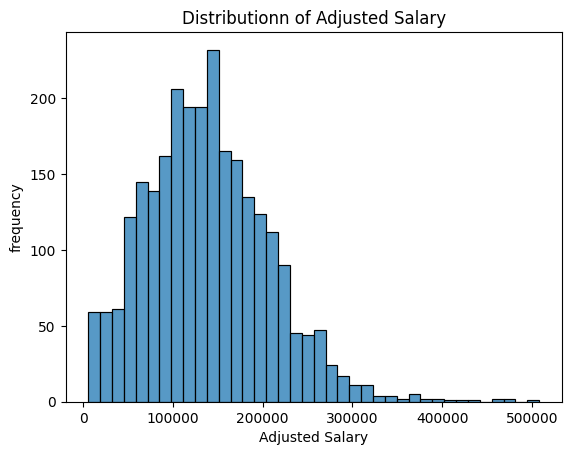

In [ ]:
sns.histplot(data['adjusted_salary'])

pyplot.title('Distributionn of Adjusted Salary')
pyplot.ylabel('frequency')
pyplot.xlabel('Adjusted Salary')
pyplot.show()

1.10 Boxplot and Swarmplot of Adjusted Salary


<function matplotlib.pyplot.show(close=None, block=None)>

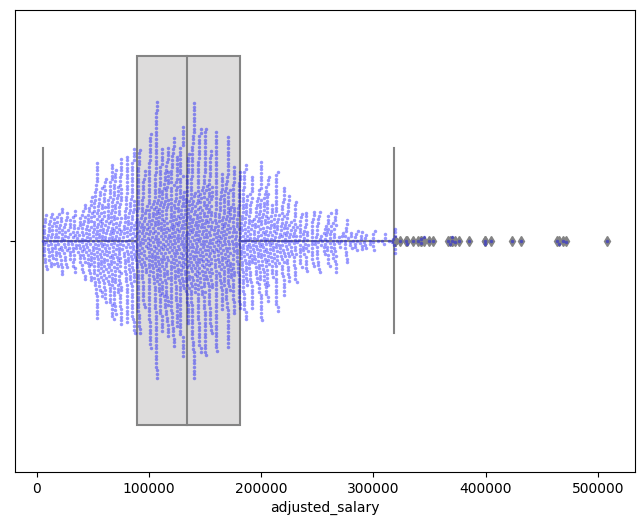

In [ ]:
pyplot.figure(figsize= (8,6))

sns.boxplot(x=data['adjusted_salary'],palette = 'coolwarm')
sns.swarmplot(x=data['adjusted_salary'],color='blue',alpha=0.4, size=2.5)

pyplot.show

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

1. Show the median adjusted data scientist salary, for each experience level


In [ ]:
data[data['job_category'] == 'Data Scientist'].groupby('experience_level')['adjusted_salary'].median()

experience_level
Entry level                82715.648
Executive level           169335.000
Mid/Intermediate level     95850.000
Senior                    162722.500
Name: adjusted_salary, dtype: float64

2. Show the number of records for each company_location, sorted descending


In [ ]:
data.groupby('company_location').size().sort_values(ascending=False)

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
EG       1
MT       1
MK       1
MD       1
VN       1
Length: 72, dtype: int64

3. From this data, show the median adjusted salary of employee who works for company located in Indonesia, do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
indonesia_salaries = data[data['company_location'] == 'IN']
median_salary_indonesia = indonesia_salaries['adjusted_salary'].median()
print("Median Adjusted Salary in Indonesia:", median_salary_indonesia)


Median Adjusted Salary in Indonesia: 19925.632


: In my opinion,that value not represent the salary in indonesia, the median adjusted salary in Indonesia is too high, as the average salary in a company in Indonesia generally does not reach 100 million rupiah. Perhaps the median in the adjusted salary in Indonesia can represent a part of the salaries in Indonesia, but to represent them comprehensively, it cannot be confirmed and requires a more in-depth analysis, taking into account various relevant factors.